In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import sklearn

%matplotlib inline


In [6]:
# Load SCF data in STATA version "Full Public Data Set - Full data sets of all SCF variables."
df22 = pd.read_stata('p22i6.dta') 
df19 = pd.read_stata('p19i6.dta') 
df16 = pd.read_stata('p16i6.dta') 
df13 = pd.read_stata('p13i6.dta') 
df10 = pd.read_stata('p10i6.dta') 
df07 = pd.read_stata('p07i6.dta') 
df04 = pd.read_stata('p04i6.dta') 
df01 = pd.read_stata('p01i6.dta') 
df98 = pd.read_stata('p98i6.dta') 
df95 = pd.read_stata('p95i6.dta') 
df92 = pd.read_stata('p92i4.dta')
df89 = pd.read_stata('p89i6.dta') 

### a)

In [7]:
dfs = [df22, df19, df16, df13, df10, df07, df04, df01, df98, df95, df92, df89]
years = [2022, 2019, 2016, 2013, 2010, 2007, 2004, 2001, 1998, 1995, 1992, 1989]
shares_10 = []
shares_05 = []
shares_01 = []
shares_001 = []

# total income is 'x5729' since 2013 while it was 'X5729' beforehand
# Note: Based on the wording in the problem, I decided to interprete it literally and use "weighetd total income" as variable of interest here.

def calculate_share_top_percentile(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['weighted_total_income'] = df['x5729']*df['x42001']/5
            df = df.sort_values(by='weighted_total_income', ascending=False)
            total_income = df['weighted_total_income'].sum()
        
            top_10_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.10)).sum()
            top_5_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.05)).sum()
            top_1_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.01)).sum()
            top_tenth_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.001)).sum()
            
            share_top_10_percentile = (top_10_percentile_income / total_income) * 100
            share_top_5_percentile = (top_5_percentile_income / total_income) * 100
            share_top_1_percentile = (top_1_percentile_income / total_income) * 100
            share_top_tenth_percentile = (top_tenth_percentile_income / total_income) * 100
            
            shares_10.append(share_top_10_percentile)
            shares_05.append(share_top_5_percentile)
            shares_01.append(share_top_1_percentile)
            shares_001.append(share_top_tenth_percentile)

        else:
            df['weighted_total_income'] = df['X5729']*df['X42001']/5
            df = df.sort_values(by='weighted_total_income', ascending=False)
            total_income = df['weighted_total_income'].sum()
        
            top_10_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.10)).sum()
            top_5_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.05)).sum()
            top_1_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.01)).sum()
            top_tenth_percentile_income = df['weighted_total_income'].head(int(len(df) * 0.001)).sum()
            
            share_top_10_percentile = (top_10_percentile_income / total_income) * 100
            share_top_5_percentile = (top_5_percentile_income / total_income) * 100
            share_top_1_percentile = (top_1_percentile_income / total_income) * 100
            share_top_tenth_percentile = (top_tenth_percentile_income / total_income) * 100
            
            shares_10.append(share_top_10_percentile)
            shares_05.append(share_top_5_percentile)
            shares_01.append(share_top_1_percentile)
            shares_001.append(share_top_tenth_percentile)
        
calculate_share_top_percentile(dfs)
df = pd.DataFrame({'Year': years, 'Top_10_shares': shares_10, 'Top_05_shares': shares_05, 'Top_01_shares': shares_01, 'Top_tenth_shares': shares_001})
#values are in percentage
df

,Year,Top_10_shares,Top_05_shares,Top_01_shares,Top_tenth_shares
0,2022,44.806321,31.309085,13.580399,4.035093
1,2019,39.056578,26.603114,10.466994,2.349442
2,2016,41.956871,30.739078,13.992579,3.817146
3,2013,39.604140,27.530677,11.677319,2.855684
4,2010,38.675040,26.736401,11.041289,2.595443
5,2007,36.053005,24.009174,8.682922,1.713459
6,2004,35.461970,22.988390,8.022525,1.564098
7,2001,40.683241,28.495458,13.077599,4.270969
8,1998,36.345799,23.794657,9.255105,2.566854
9,1995,35.536314,23.240052,8.629450,2.016763


### b)

In [8]:
def gini_coef(dfs):
    gini_coefficients = []
    for i, df in enumerate(dfs):
        sorted_df = df.sort_values(by='weighted_total_income') 
        total_income = sorted_df['weighted_total_income'].sum()
        n = len(sorted_df)
    
        cumulative_income = sorted_df['weighted_total_income'].cumsum()
        Lorenz_curve_area = (cumulative_income / total_income) + (sorted_df['weighted_total_income'] / (2 * total_income))

        gini_coefficient = 1 - 2 * Lorenz_curve_area.sum() / n

        gini_coefficients.append(gini_coefficient)
    
    return gini_coefficients
    
gini_coefficients=gini_coef(dfs)
# gini_coefficients

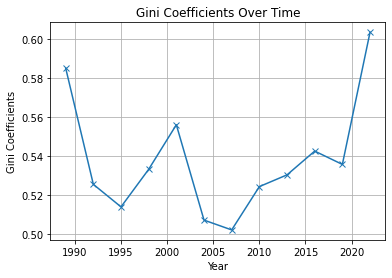

In [12]:
plt.plot(list(reversed(years)), list(reversed(gini_coefficients)), marker='x', label=None)
plt.xlabel('Year')
plt.ylabel('Gini Coefficients')
plt.title('Gini Coefficients Over Time')
plt.grid(True)

plt.show()

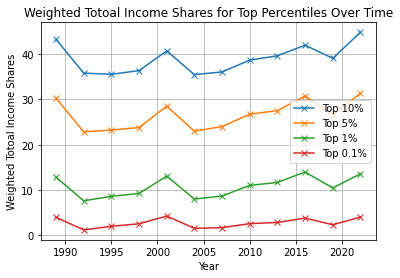

In [26]:
def plot_xy(x_values, y_values_list, x_label='X-axis', y_label='Y-axis', title='XY Plot', labels=None):
    if not labels:
        labels = ['Data Points'] * len(y_values_list)

    for i, y_values in enumerate(y_values_list):
        # Create a line plot for each set of y values
        plt.plot(x_values, y_values, marker='x', linestyle='-', label=labels[i])

    # Customize the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot top percentile income shares from (a)
shares_list = [list(reversed(shares_10)), list(reversed(shares_05)), list(reversed(shares_01)), list(reversed(shares_001))]
labels = ['Top 10%', 'Top 5%', 'Top 1%', 'Top 0.1%']
plot_xy(list(reversed(years)), shares_list, 'Year', 'Weighted Totoal Income Shares', 'Weighted Totoal Income Shares for Top Percentiles Over Time', labels)


### C)

In [17]:
# Assume the weights are applied to all data entries in SCF

def calculate_market_income(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['market_income'] = (df['x5729']-df['x5706']-df['x5716']-df['x5718']-df['x5720']-df['x5306']-df['x5311'])*df['x42001']/5
        else:
            df['market_income'] = (df['X5729']-df['X5706']-df['X5716']-df['X5718']-df['X5720']-df['X5306']-df['X5311'])*df['X42001']/5

def calculate_capital_income(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['capital_income'] = (df['x5704']+df['x5714']+df['x5708']+df['x5710']+df.apply(lambda row: max(row['x5712'], -3000), axis = 1))*df['x42001']/5
        else:
            df['capital_income'] = (df['X5704']+df['X5714']+df['X5708']+df['X5710']+df.apply(lambda row: max(row['X5712'], -3000), axis = 1))*df['X42001']/5
            # Cap the capital losses at $3,000
calculate_market_income(dfs)      
calculate_capital_income(dfs)

In [19]:
# Assume the weights are applied to all data entries in SCF

def calculate_market_income(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['market_income'] = (df['x5729']-df['x5706']-df['x5716']-df['x5718']-df['x5720']-df['x5306']-df['x5311'])*df['x42001']/5
        else:
            df['market_income'] = (df['X5729']-df['X5706']-df['X5716']-df['X5718']-df['X5720']-df['X5306']-df['X5311'])*df['X42001']/5

def calculate_capital_income(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['capital_income'] = (df['x5704']+df['x5714']+df['x5708']+df['x5710']+df.apply(lambda row: max(row['x5712'], -3000), axis = 1))*df['x42001']/5
        else:
            df['capital_income'] = (df['X5704']+df['X5714']+df['X5708']+df['X5710']+df.apply(lambda row: max(row['X5712'], -3000), axis = 1))*df['X42001']/5
            # Cap the capital losses at $3,000
calculate_market_income(dfs)      
calculate_capital_income(dfs)

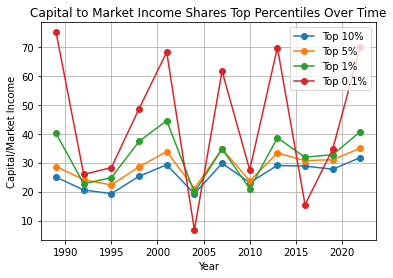

In [22]:
cap_to_mkt10=[]
cap_to_mkt05=[]
cap_to_mkt01=[]
cap_to_mkt001=[]

def calculate_capital_to_market_income_share(dfs):
    top_10_percentile_market_income = 0
    top_05_percentile_market_income = 0
    top_01_percentile_market_income = 0
    top_tenth_percentile_market_income = 0
    top_10_percentile_cap_income = 0
    top_05_percentile_cap_income = 0
    top_01_percentile_cap_income = 0
    top_tenth_percentile_cap_income = 0
    
    for i, df in enumerate(dfs):

        filtered_df_10 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.9)]
        top_10_percentile_market_income = filtered_df_10['market_income'].sum()
        top_10_percentile_cap_income = filtered_df_10['capital_income'].sum()

        filtered_df_05 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.95)]
        top_05_percentile_market_income = filtered_df_05['market_income'].sum()
        top_05_percentile_cap_income = filtered_df_05['capital_income'].sum()
        
        filtered_df_01 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.99)]
        top_01_percentile_market_income = filtered_df_01['market_income'].sum()
        top_01_percentile_cap_income = filtered_df_01['capital_income'].sum()
        
        filtered_df_001 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.999)]
        top_tenth_percentile_market_income = filtered_df_001['market_income'].sum()
        top_tenth_percentile_cap_income = filtered_df_001['capital_income'].sum()
        
        cap_to_mkt10.append(top_10_percentile_cap_income/top_10_percentile_market_income*100)
        cap_to_mkt05.append(top_05_percentile_cap_income/top_05_percentile_market_income*100)
        cap_to_mkt01.append(top_01_percentile_cap_income/top_01_percentile_market_income*100)
        cap_to_mkt001.append(top_tenth_percentile_cap_income/top_tenth_percentile_market_income*100)


calculate_capital_to_market_income_share(dfs)
cap_share_list = [list(reversed(cap_to_mkt10)), list(reversed(cap_to_mkt05)), list(reversed(cap_to_mkt01)), list(reversed(cap_to_mkt001))]
plot_xy(list(reversed(years)), cap_share_list, 'Year', 'Capital/Market Income', 'Capital to Market Income Shares Top Percentiles Over Time',labels)

### d)

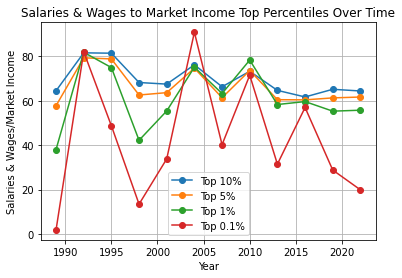

In [25]:
# Salaries and wages variable is 'x5702'
def calculate_salaries_wages(dfs):
    for i, df in enumerate(dfs):
        if i <=3:
            df['salaries_wages'] = df['x5702']*df['x42001']/5
        else:
            df['salaries_wages'] = df['X5702']*df['X42001']/5
            
wage_to_mkt10=[]
wage_to_mkt05=[]
wage_to_mkt01=[]
wage_to_mkt001=[]

def calculate_wages_to_market_income_share(dfs):
    for i, df in enumerate(dfs):
        
        filtered_df_10 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.9)]
        top_10_percentile_market_income = filtered_df_10['market_income'].sum()
        top_10_percentile_wage_income = filtered_df_10['salaries_wages'].sum()

        filtered_df_05 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.95)]
        top_05_percentile_market_income = filtered_df_05['market_income'].sum()
        top_05_percentile_wage_income = filtered_df_05['salaries_wages'].sum()
        
        filtered_df_01 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.99)]
        top_01_percentile_market_income = filtered_df_01['market_income'].sum()
        top_01_percentile_wage_income = filtered_df_01['salaries_wages'].sum()
        
        filtered_df_001 = df[df['weighted_total_income'] >= df['weighted_total_income'].quantile(0.999)]
        top_tenth_percentile_market_income = filtered_df_001['market_income'].sum()
        top_tenth_percentile_wage_income = filtered_df_001['salaries_wages'].sum()
        
        wage_to_mkt10.append(top_10_percentile_wage_income/top_10_percentile_market_income*100)
        wage_to_mkt05.append(top_05_percentile_wage_income/top_05_percentile_market_income*100)
        wage_to_mkt01.append(top_01_percentile_wage_income/top_01_percentile_market_income*100)
        wage_to_mkt001.append(top_tenth_percentile_wage_income/top_tenth_percentile_market_income*100)

calculate_salaries_wages(dfs)
calculate_wages_to_market_income_share(dfs)
wage_share_list = [list(reversed(wage_to_mkt10)), list(reversed(wage_to_mkt05)), list(reversed(wage_to_mkt01)), list(reversed(wage_to_mkt001))]
plot_xy(list(reversed(years)), wage_share_list, 'Year', 'Salaries & Wages/Market Income', 'Salaries & Wages to Market Income Top Percentiles Over Time',labels)